In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

load data and cleaning

In [104]:
df = pd.read_csv("digital_wallet_transactions.csv")
df

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban


In [105]:
df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [106]:
df.tail()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban
4999,5000,5e1a9245-9f2b-4ff9-bd56-26fd20c8eae2,USER_08419,2024-08-18 01:15,Food Delivery,Vegetable Biryani,Foodpanda,1683.63,11.43,70.44,936,UPI,Successful,MERCH_0446,Web,Urban


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
dtypes: flo

In [108]:
df.describe()

,idx,product_amount,transaction_fee,cashback,loyalty_points
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,4957.502722,25.188874,50.658782,498.790400
std,1443.520003,2885.034160,14.535298,28.522467,288.962434
min,1.000000,10.090000,0.010000,0.000000,0.000000
25%,1250.750000,2453.977500,12.665000,26.495000,246.000000
50%,2500.500000,4943.685000,25.070000,51.390000,504.000000
75%,3750.250000,7444.815000,37.947500,75.067500,749.000000
max,5000.000000,9996.950000,49.990000,100.000000,999.000000


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idx,5000.0,2500.500000,1443.520003,1.00,1250.7500,2500.500,3750.2500,5000.00
product_amount,5000.0,4957.502722,2885.034160,10.09,2453.9775,4943.685,7444.8150,9996.95
transaction_fee,5000.0,25.188874,14.535298,0.01,12.6650,25.070,37.9475,49.99
cashback,5000.0,50.658782,28.522467,0.00,26.4950,51.390,75.0675,100.00
loyalty_points,5000.0,498.790400,288.962434,0.00,246.0000,504.000,749.0000,999.00


In [110]:
df.sum()

idx                                                            12502500
transaction_id        4dac3ea3-6492-46ec-80b8-dc45c3ad0b14a903ed9f-e...
user_id               USER_05159USER_07204USER_00903USER_01769USER_0...
transaction_date      2023-08-19 03:322023-08-19 04:372023-08-19 05:...
product_category      Rent PaymentGas BillBus TicketInternet BillLoa...
product_name          2BHK Flat DepositCommercial Gas ConnectionSemi...
merchant_name         AirbnbAdani GasMakeMyTrip BusAirtel BroadbandA...
product_amount                                              24787513.61
transaction_fee                                               125944.37
cashback                                                      253293.91
loyalty_points                                                  2493952
payment_method        Debit CardUPIUPIDebit CardDebit CardUPIUPIUPIU...
transaction_status    SuccessfulSuccessfulSuccessfulSuccessfulSucces...
merchant_id           MERCH_0083MERCH_0163MERCH_0320MERCH_0194ME

In [111]:
df.isnull().sum()

idx                   0
transaction_id        0
user_id               0
transaction_date      0
product_category      0
product_name          0
merchant_name         0
product_amount        0
transaction_fee       0
cashback              0
loyalty_points        0
payment_method        0
transaction_status    0
merchant_id           0
device_type           0
location              0
dtype: int64

In [112]:
df.dropna()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban


In [113]:
df.columns

Index(['idx', 'transaction_id', 'user_id', 'transaction_date',
       'product_category', 'product_name', 'merchant_name', 'product_amount',
       'transaction_fee', 'cashback', 'loyalty_points', 'payment_method',
       'transaction_status', 'merchant_id', 'device_type', 'location'],
      dtype='object')

Analyze spending patterns across different product categories

In [114]:
spending_patterns = df.groupby('product_category')['product_amount'].sum().reset_index()
spending_patterns = spending_patterns.sort_values(by='product_amount', ascending=False)

print(spending_patterns)

     product_category  product_amount
17  Streaming Service      1462461.66
19         Water Bill      1400668.85
6            Gas Bill      1361519.80
1       Education Fee      1349321.77
14       Movie Ticket      1337399.89
9       Hotel Booking      1319603.90
4       Food Delivery      1317106.21
18          Taxi Fare      1306566.24
16       Rent Payment      1258263.69
11      Internet Bill      1247178.07
2    Electricity Bill      1245972.74
12     Loan Repayment      1210681.76
15    Online Shopping      1207396.13
13    Mobile Recharge      1196334.68
5      Gaming Credits      1136665.44
8    Grocery Shopping      1134972.71
3      Flight Booking      1124283.05
0          Bus Ticket      1115711.58
10  Insurance Premium      1032608.99
7           Gift Card      1022796.45


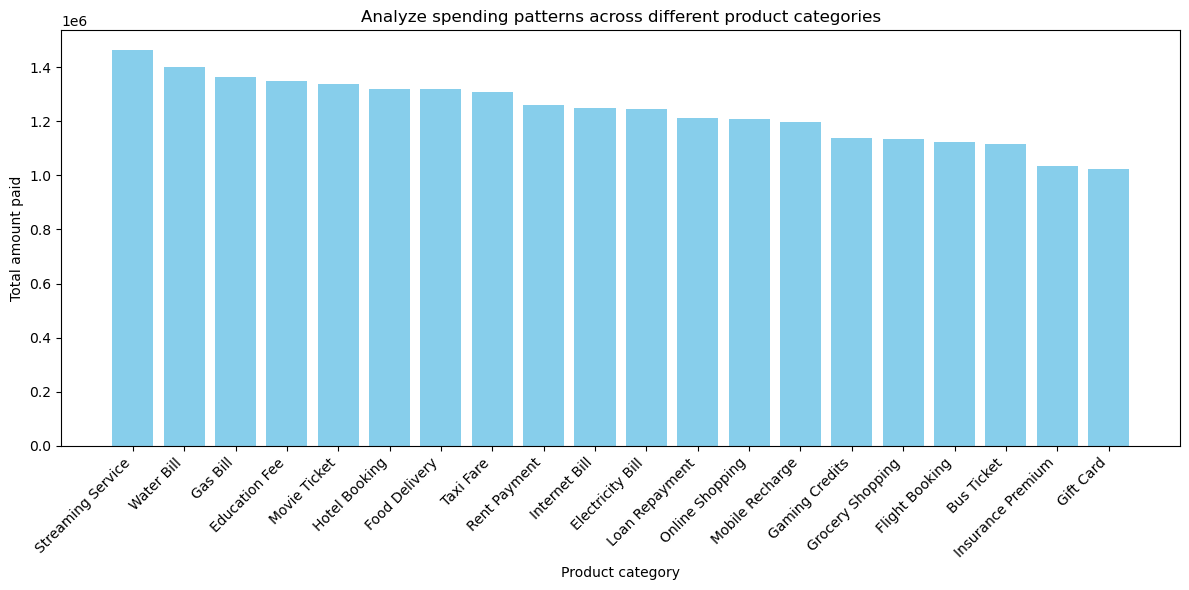

In [115]:
plt.figure(figsize=(12, 6))
plt.bar(spending_patterns['product_category'], spending_patterns['product_amount'], color='skyblue')
plt.xlabel('Product category')
plt.ylabel('Total amount paid')
plt.title('Analyze spending patterns across different product categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Examine the effectiveness of cash back and loyalty programs

In [116]:
cashback_effectiveness = df.groupby('product_category')['cashback'].mean().reset_index()
cashback_effectiveness = cashback_effectiveness.sort_values(by='cashback', ascending=False)


print(cashback_effectiveness)

     product_category   cashback
4       Food Delivery  52.426293
2    Electricity Bill  52.394087
3      Flight Booking  52.343241
7           Gift Card  52.267602
16       Rent Payment  51.776653
18          Taxi Fare  51.763984
17  Streaming Service  51.344849
8    Grocery Shopping  50.812647
14       Movie Ticket  50.787684
13    Mobile Recharge  50.711992
19         Water Bill  50.625385
11      Internet Bill  50.432575
0          Bus Ticket  50.423404
1       Education Fee  50.278042
9       Hotel Booking  49.783832
15    Online Shopping  49.367325
10  Insurance Premium  49.285778
12     Loan Repayment  48.998816
6            Gas Bill  48.730640
5      Gaming Credits  48.535887


In [117]:
loyalty_effectiveness = df.groupby('product_category')['loyalty_points'].mean().reset_index()
loyalty_effectiveness = loyalty_effectiveness.sort_values(by='loyalty_points', ascending=False)


print(loyalty_effectiveness)

     product_category  loyalty_points
10  Insurance Premium      519.977778
3      Flight Booking      517.597222
17  Streaming Service      515.675585
5      Gaming Credits      514.251082
18          Taxi Fare      513.777344
12     Loan Repayment      511.028571
9       Hotel Booking      506.467153
2    Electricity Bill      505.206349
16       Rent Payment      504.091633
8    Grocery Shopping      503.773109
19         Water Bill      502.626374
4       Food Delivery      502.227799
15    Online Shopping      497.320988
13    Mobile Recharge      496.580913
0          Bus Ticket      492.953191
11      Internet Bill      480.120172
6            Gas Bill      479.464000
7           Gift Card      474.063348
1       Education Fee      472.283217
14       Movie Ticket      469.488971


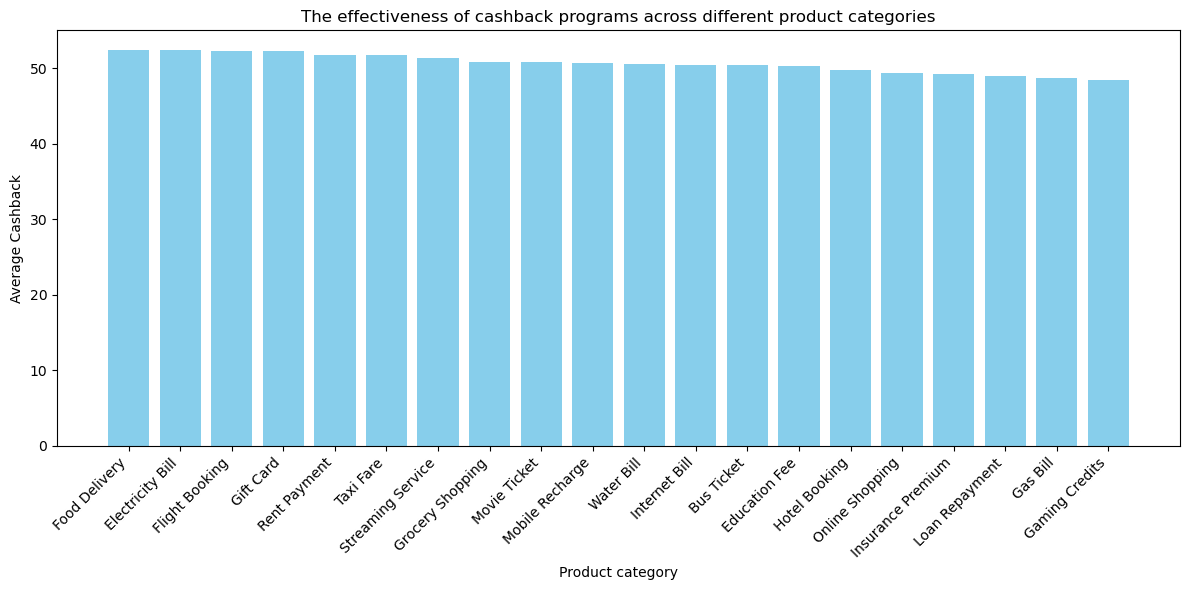

In [118]:
plt.figure(figsize=(12, 6))
plt.bar(cashback_effectiveness['product_category'], cashback_effectiveness['cashback'], color='skyblue')
plt.xlabel('Product category')
plt.ylabel('Average Cashback')
plt.title('The effectiveness of cashback programs across different product categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

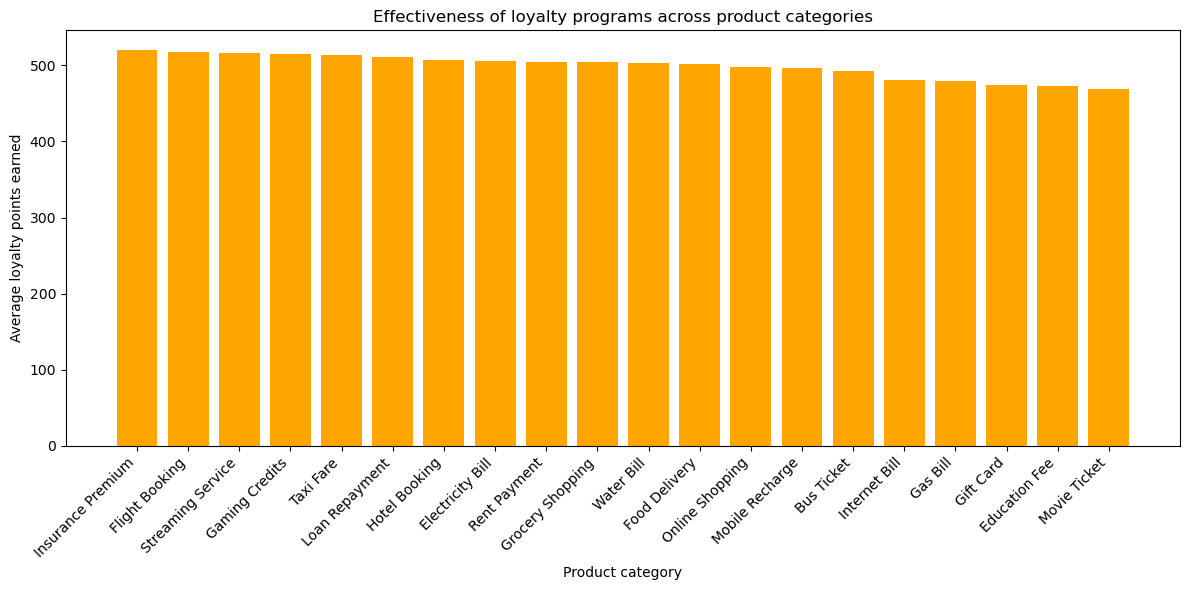

In [119]:
plt.figure(figsize=(12, 6))
plt.bar(loyalty_effectiveness['product_category'], loyalty_effectiveness['loyalty_points'], color='orange')
plt.xlabel('Product category')
plt.ylabel('Average loyalty points earned')
plt.title('Effectiveness of loyalty programs across product categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Investigate the relationship between payment methods and transaction success rates

In [120]:
successful_transactions = df[df['transaction_status'] == 'Successful']
successful_count = successful_transactions.groupby('payment_method').size().reset_index(name='successful_count')
total_count = df.groupby('payment_method').size().reset_index(name='total_count')
success_rate = pd.merge(successful_count, total_count, on='payment_method')
success_rate['success_rate'] = success_rate['successful_count'] / success_rate['total_count']
success_rate = success_rate.sort_values(by='success_rate', ascending=False)
print(success_rate)

   payment_method  successful_count  total_count  success_rate
2      Debit Card               988         1022      0.966732
0   Bank Transfer               998         1045      0.955024
3             UPI               950          999      0.950951
4  Wallet Balance               886          942      0.940552
1     Credit Card               933          992      0.940524


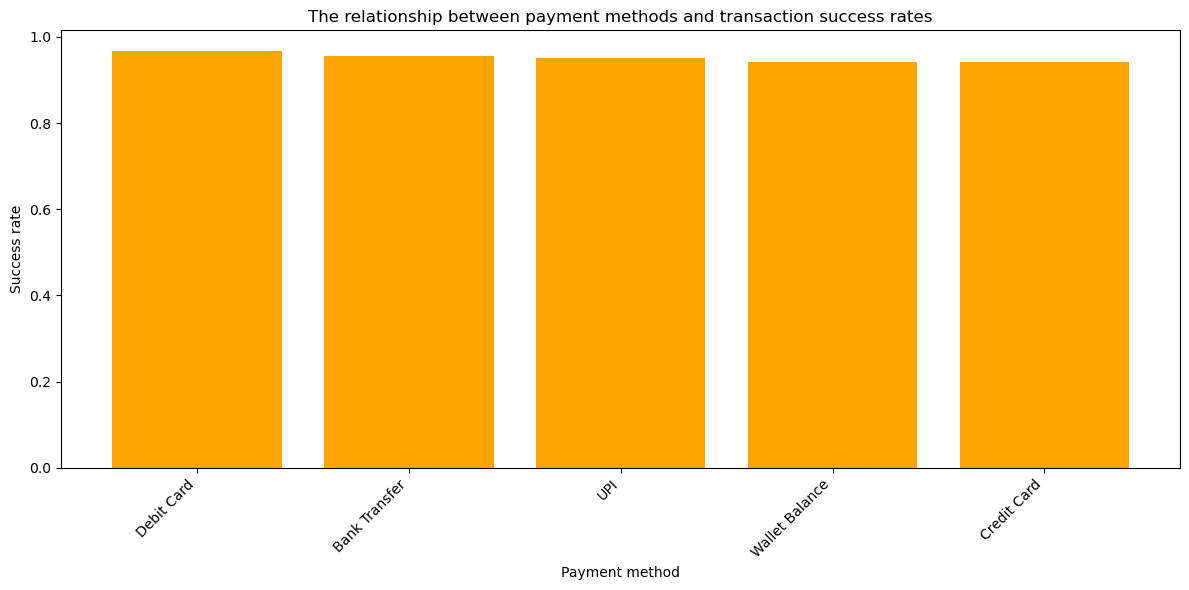

In [121]:
plt.figure(figsize=(12, 6))
plt.bar(success_rate['payment_method'], success_rate['success_rate'], color='orange')
plt.xlabel('Payment method')
plt.ylabel('Success rate')
plt.title('The relationship between payment methods and transaction success rates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Explore seasonal trends in digital wallet usage

In [122]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year_month'] = df['transaction_date'].dt.to_period('M')
monthly_transactions = df.groupby('year_month').size().reset_index(name='transaction_count')
print("Monthly trends in digital wallet usage:")
print(monthly_transactions)

Monthly trends in digital wallet usage:
   year_month  transaction_count
0     2023-08                168
1     2023-09                418
2     2023-10                420
3     2023-11                400
4     2023-12                428
5     2024-01                405
6     2024-02                394
7     2024-03                426
8     2024-04                389
9     2024-05                447
10    2024-06                417
11    2024-07                429
12    2024-08                259


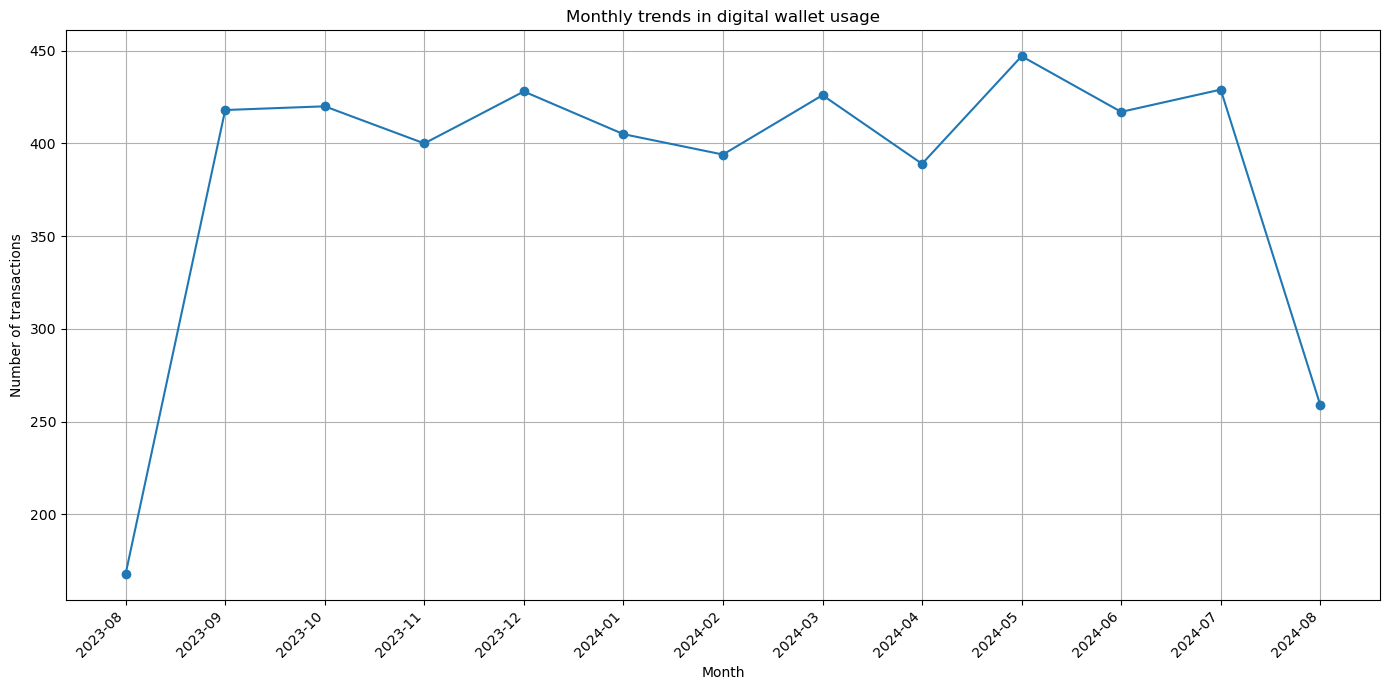

In [123]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_transactions['year_month'].astype(str), monthly_transactions['transaction_count'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of transactions')
plt.title('Monthly trends in digital wallet usage')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [124]:
df['year_week'] = df['transaction_date'].dt.to_period('W')
weekly_transactions = df.groupby('year_week').size().reset_index(name='transaction_count')
print("Weekly trends in digital wallet usage:")
print(weekly_transactions)

Weekly trends in digital wallet usage:
                year_week  transaction_count
0   2023-08-14/2023-08-20                 43
1   2023-08-21/2023-08-27                 84
2   2023-08-28/2023-09-03                 81
3   2023-09-04/2023-09-10                 89
4   2023-09-11/2023-09-17                102
5   2023-09-18/2023-09-24                110
6   2023-09-25/2023-10-01                100
7   2023-10-02/2023-10-08                100
8   2023-10-09/2023-10-15                102
9   2023-10-16/2023-10-22                 86
10  2023-10-23/2023-10-29                 86
11  2023-10-30/2023-11-05                 80
12  2023-11-06/2023-11-12                 89
13  2023-11-13/2023-11-19                104
14  2023-11-20/2023-11-26                 98
15  2023-11-27/2023-12-03                100
16  2023-12-04/2023-12-10                 96
17  2023-12-11/2023-12-17                 96
18  2023-12-18/2023-12-24                100
19  2023-12-25/2023-12-31                 88
20  2024-01-01/2

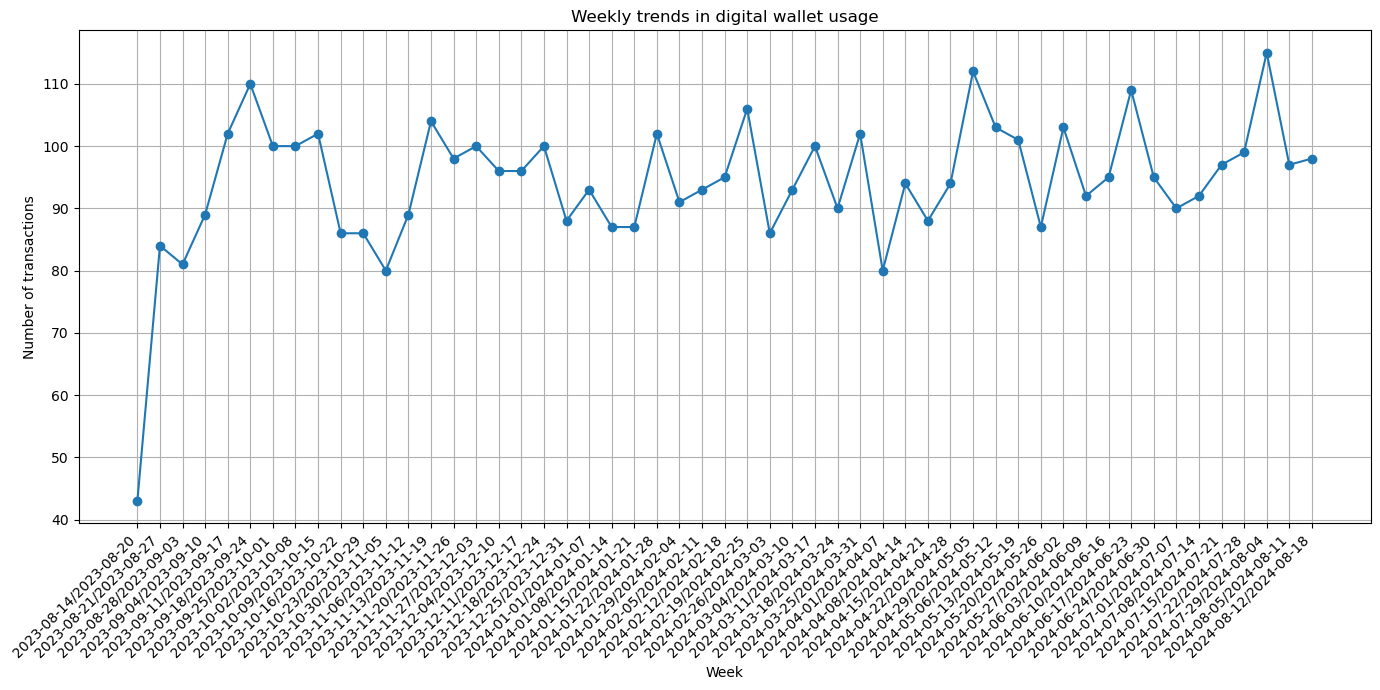

In [125]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_transactions['year_week'].astype(str), weekly_transactions['transaction_count'], marker='o', linestyle='-')
plt.xlabel('Week')
plt.ylabel('Number of transactions')
plt.title('Weekly trends in digital wallet usage')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Developing fraud detection models based on transaction patterns

In [126]:
df.fillna(0, inplace=True)

In [127]:
print(X.dtypes)


idx                          int64
transaction_id              object
user_id                     object
transaction_date    datetime64[ns]
product_category             int32
product_name                 int32
merchant_name                int32
product_amount             float64
transaction_fee            float64
cashback                   float64
loyalty_points               int64
payment_method               int32
merchant_id                  int32
device_type                  int32
location                     int32
year_month                   int64
year_week                    int64
is_fraud                     int32
dtype: object


In [128]:
print(df['year_month'].head())
print(df['year_month'].dtype)


0    2023-08
1    2023-08
2    2023-08
3    2023-08
4    2023-08
Name: year_month, dtype: period[M]
period[M]


In [129]:
print(df['year_week'].unique())


<PeriodArray>
['2023-08-14/2023-08-20', '2023-08-21/2023-08-27', '2023-08-28/2023-09-03',
 '2023-09-04/2023-09-10', '2023-09-11/2023-09-17', '2023-09-18/2023-09-24',
 '2023-09-25/2023-10-01', '2023-10-02/2023-10-08', '2023-10-09/2023-10-15',
 '2023-10-16/2023-10-22', '2023-10-23/2023-10-29', '2023-10-30/2023-11-05',
 '2023-11-06/2023-11-12', '2023-11-13/2023-11-19', '2023-11-20/2023-11-26',
 '2023-11-27/2023-12-03', '2023-12-04/2023-12-10', '2023-12-11/2023-12-17',
 '2023-12-18/2023-12-24', '2023-12-25/2023-12-31', '2024-01-01/2024-01-07',
 '2024-01-08/2024-01-14', '2024-01-15/2024-01-21', '2024-01-22/2024-01-28',
 '2024-01-29/2024-02-04', '2024-02-05/2024-02-11', '2024-02-12/2024-02-18',
 '2024-02-19/2024-02-25', '2024-02-26/2024-03-03', '2024-03-04/2024-03-10',
 '2024-03-11/2024-03-17', '2024-03-18/2024-03-24', '2024-03-25/2024-03-31',
 '2024-04-01/2024-04-07', '2024-04-08/2024-04-14', '2024-04-15/2024-04-21',
 '2024-04-22/2024-04-28', '2024-04-29/2024-05-05', '2024-05-06/2024-05-12'

In [130]:
print(df.columns)


Index(['idx', 'transaction_id', 'user_id', 'transaction_date',
       'product_category', 'product_name', 'merchant_name', 'product_amount',
       'transaction_fee', 'cashback', 'loyalty_points', 'payment_method',
       'transaction_status', 'merchant_id', 'device_type', 'location',
       'year_month', 'year_week'],
      dtype='object')


In [136]:
df['year_month'] = pd.to_datetime(df['year_month'].astype(str) + '01', format='%Y%m%d', errors='coerce')
print(df['year_month'].isna().sum())

5000


In [137]:
df['year_week'] = pd.to_datetime(df['year_week'].astype(str) + '-0', format='%Y-%W-%w', errors='coerce') 
print(df['year_week'].isna().sum())

5000


In [138]:
print(df[['year_month', 'year_week']].isna().sum())

year_month    5000
year_week     5000
dtype: int64


Segment users based on their spending behavior

In [139]:

user_summary = df.groupby('user_id').agg({
    'product_amount': ['sum', 'count', 'mean'],

})

user_summary.columns = ['total_spent', 'transaction_count', 'average_spent']
user_summary.reset_index(inplace=True)

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
user_summary_scaled = scaler.fit_transform(user_summary[['total_spent', 'transaction_count', 'average_spent']])

In [141]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)  
user_summary['cluster'] = kmeans.fit_predict(user_summary_scaled)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [142]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
user_summary['cluster'] = dbscan.fit_predict(user_summary_scaled)

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


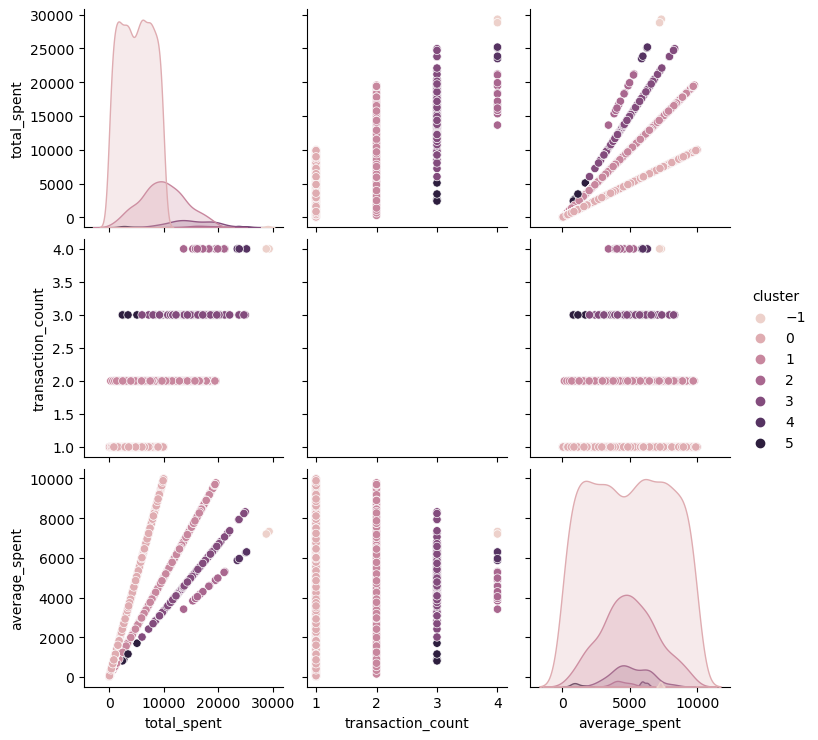

In [143]:
sns.pairplot(user_summary, hue='cluster')
plt.show()

Analyze the popularity of different merchants and services

In [144]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
transactions_per_merchant = df.groupby('merchant_name').size()
amount_per_merchant = df.groupby('merchant_name')['product_amount'].sum()

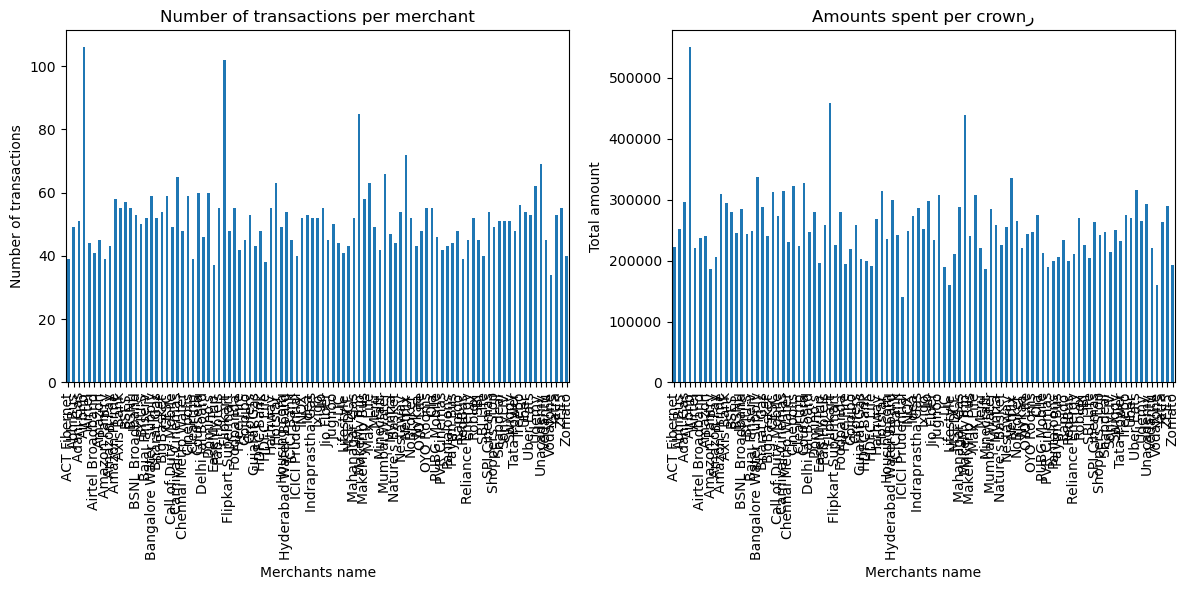

In [145]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transactions_per_merchant.plot(kind='bar')
plt.title('Number of transactions per merchant')
plt.xlabel('Merchants name')
plt.ylabel('Number of transactions')

plt.subplot(1, 2, 2)
amount_per_merchant.plot(kind='bar')
plt.title('Amounts spent per crownر')
plt.xlabel('Merchants name')
plt.ylabel('Total amount')

plt.tight_layout()
plt.show()

Thank you so much for watching the entire project